In [1]:
%matplotlib widget

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from numba import njit
import scipy.interpolate

In [4]:
fixed_value = 1.8e-11

m_6052 = -97e-15
q_6052 = 6.2e-13
r2_6052 = 3.5e-26

m_6194 = -59e-15
q_6194 = 4.1e-13
r2_6194 = 0.8e-26

m_7221 = -3.4e-15
q_7221 = 2.8e-13
r2_7221 = 0.2e-26

m_7392 = -10e-15
q_7392 = 5.3e-13
r2_7392 = 0.4e-26

In [5]:
with open("colimator-scans-data.pkl", "rb") as f:
    data = pickle.load(f)

In [6]:
with open("colimator-scans-details.pkl", "rb") as f:
    details = pickle.load(f)

# Grab some beam data properly

In [7]:
details[6052]["beam1"]["horizontal"]

{'startTime': '2017-08-06 22:40:00',
 'endTime': '2017-08-07 00:50:00',
 'stepsRange': [4, 40],
 'measuredEmittance': 3.5,
 'nominalBeamSizeUM': 280,
 'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_C6_L7_B1.csv',
 'movingJaw': 'TCP.C6L7.B1:MEAS_LVDT_LU',
 'nonMovingJaw': 'TCP.C6L7.B1:MEAS_LVDT_RU'}

In [8]:
details[6052]["beam1"]["vertical"]

{'startTime': '2017-08-06 22:40:00',
 'endTime': '2017-08-07 00:50:00',
 'stepsRange': [4, 51],
 'measuredEmittance': 4.0,
 'nominalBeamSizeUM': 200,
 'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_D6_L7_B1.csv',
 'movingJaw': 'TCP.D6L7.B1:MEAS_LVDT_LU',
 'nonMovingJaw': 'TCP.D6L7.B1:MEAS_LVDT_RU'}

In [9]:
data[6052]["TCP_IR7_B1H"]["lowres"].keys()

dict_keys(['timestamps', 'TCP.C6L7.B1:MEAS_LVDT_LU', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'TCP.C6R7.B2:MEAS_LVDT_LU'])

In [10]:
data[6052]["TCP_IR7_B1V"]["lowres"].keys()

dict_keys(['timestamps', 'TCP.D6L7.B1:MEAS_LVDT_LU', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'TCP.D6R7.B2:MEAS_LVDT_LU'])

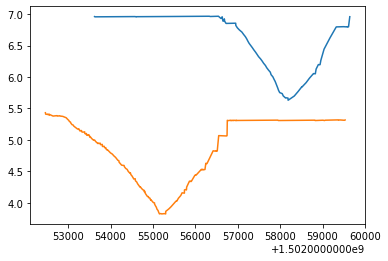

In [11]:
plt.plot(
    data[6052]["TCP_IR7_B1H"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1H"]["lowres"]["TCP.C6L7.B1:MEAS_LVDT_LU"] / 0.28,
)

# plt.plot(
#     data[6052]["TCP_IR7_B1H"]["lowres"]["timestamps"],
#     data[6052]["TCP_IR7_B1H"]["lowres"]["TCP.C6R7.B2:MEAS_LVDT_LU"] / 0.28,
# )

plt.plot(
    data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6L7.B1:MEAS_LVDT_LU"] / 0.20,
)

# plt.plot(
#     data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
#     data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6R7.B2:MEAS_LVDT_LU"] / 0.28,
# )


In [12]:
data[6052]["TCP_IR7_B1V"]["hires"].keys()

dict_keys(['BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS09', 'BLMEI.06L7.B1E10_TCP.A6L7.B1:LOSS_RS09'])

In [13]:
d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST"]
d[1][d[1]<=0] = np.nan

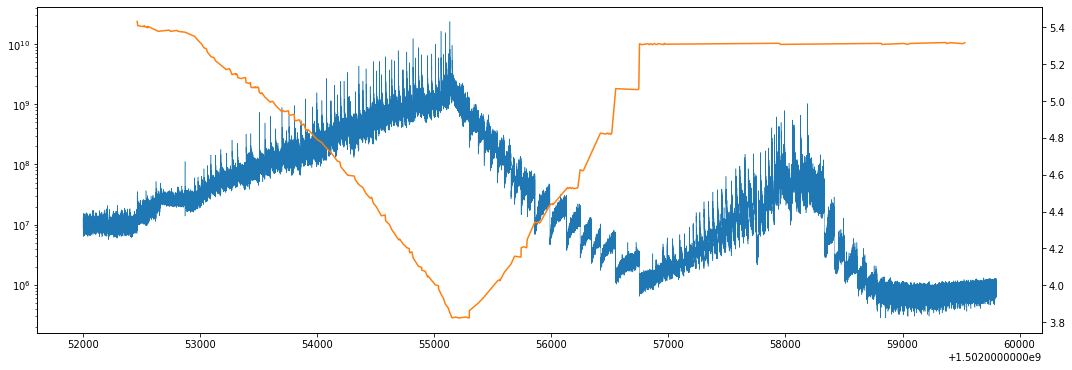

In [14]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.plot(
    data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6L7.B1:MEAS_LVDT_LU"] / 0.20,
    c="C1"
)

(1502055000.0, 1502057000.0)

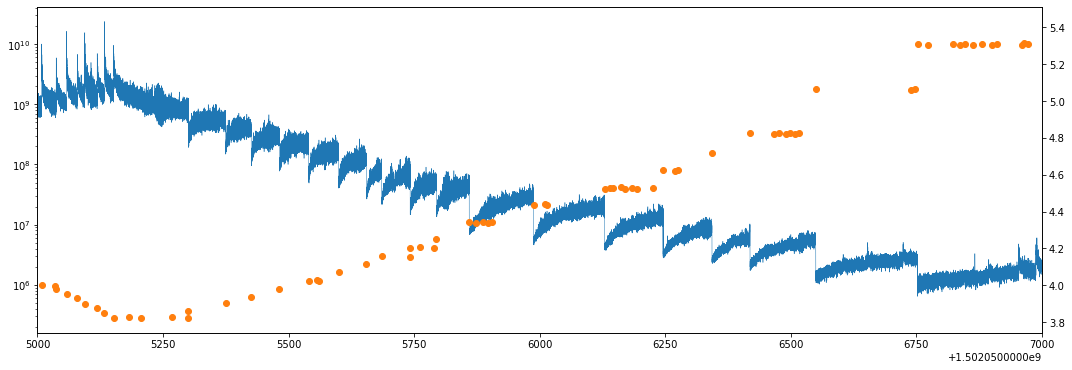

In [15]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.scatter(
    data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6L7.B1:MEAS_LVDT_LU"] / 0.20,
    c="C1"
)

plt.xlim(55000+1.5020e9, 57000+1.5020e9)

In [16]:
func = scipy.interpolate.interp1d(
    data[6052]["TCP_IR7_B1V"]["lowres"]["timestamps"],
    data[6052]["TCP_IR7_B1V"]["lowres"]["TCP.D6L7.B1:MEAS_LVDT_LU"] / 0.20,
    kind="previous", fill_value="extrapolate"
)

(1502055250.0, 1502056750.0)

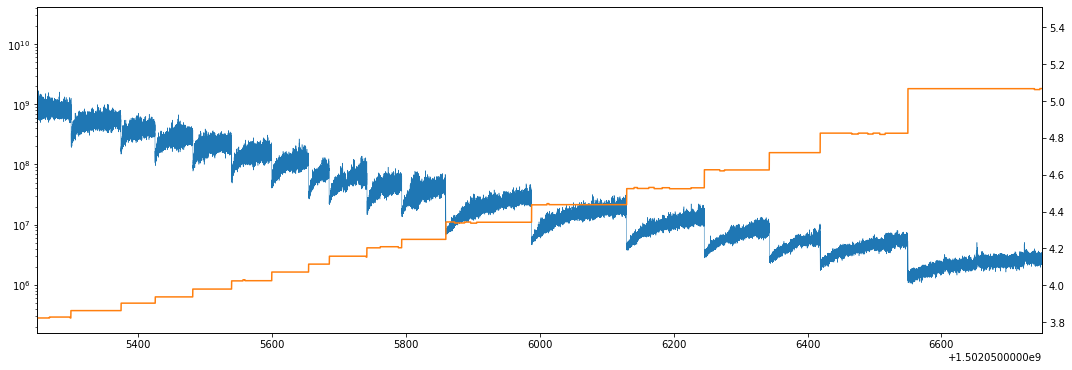

In [17]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.plot(
    d[0],
    func(d[0]),
    c="C1"
)

plt.xlim(55250+1.5020e9, 56750+1.5020e9)

(1502055250.0, 1502056750.0)

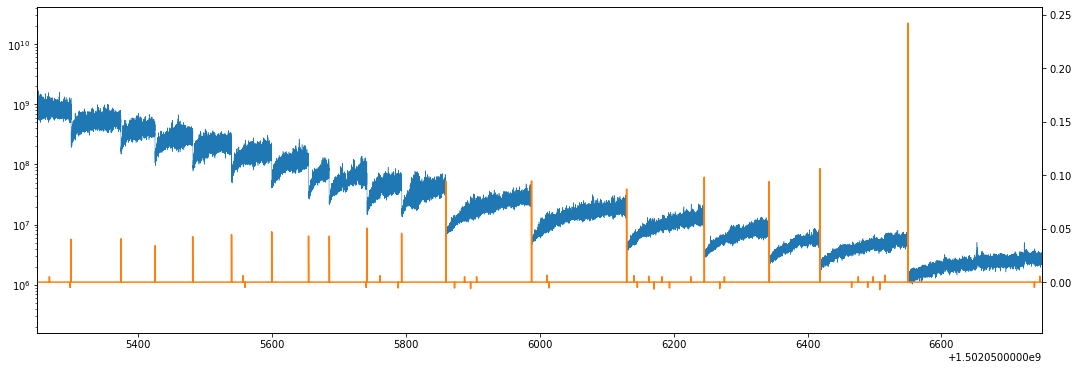

In [18]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.plot(
    d[0][:-1],
    np.diff(func(d[0])),
    c="C1"
)

plt.xlim(55250+1.5020e9, 56750+1.5020e9)

In [19]:
diffs = np.diff(func(d[0]))
idxs = np.where(diffs > 0.01)[0]
vals = d[0][np.where(diffs > 0.01)]

In [20]:
idxs

array([329838, 337335, 342432, 348031, 353829, 359827, 365324, 368424,
       374021, 379219, 385817, 398611, 412807, 424404, 434101, 441697,
       454793, 475086])

(1502055250.0, 1502056750.0)

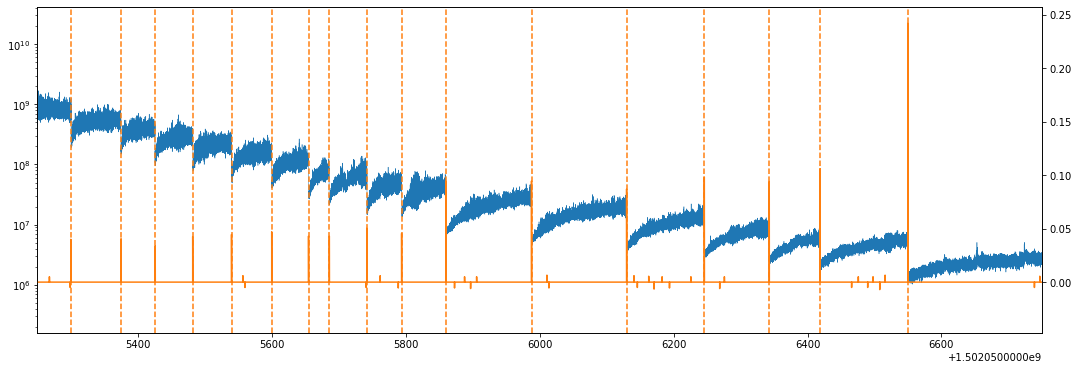

In [21]:
plt.figure(figsize=(18, 6))

plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
plt.plot(
    d[0][:-1],
    np.diff(func(d[0])),
    c="C1"
)

for v in vals:
    plt.axvline(v, c="C1", linestyle="--")

plt.xlim(55250+1.5020e9, 56750+1.5020e9)

In [22]:
slices = []

for i in range(len(vals) - 1):
    slices.append((
        d[0][idxs[i]: idxs[i+1]],
        d[1][idxs[i]: idxs[i+1]],
        np.mean(func(d[0][idxs[i]+1: idxs[i+1]-1])),
        (idxs[i], idxs[i+1])
    ))

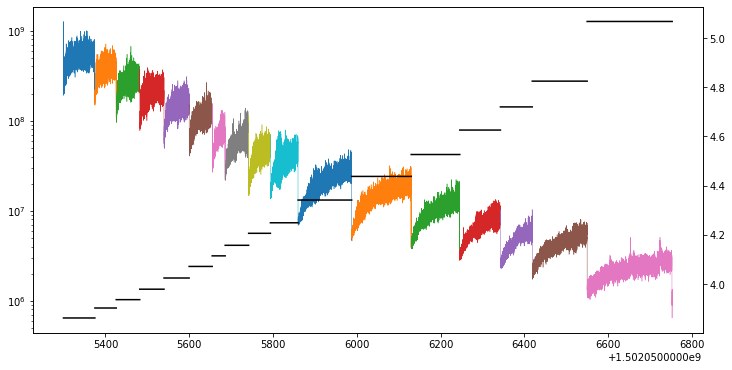

In [23]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(12, 6))

for s in slices:
    plt.plot(s[0], s[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
for s in slices:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

In [24]:
@njit
def moving_average(a: np.ndarray, n=1) -> np.ndarray :
    out = a.copy()
    for i in range(len(a)):
        out[i] = np.nanmean(a[max(0, i-n): min(len(a), i+n+1)])
    return out

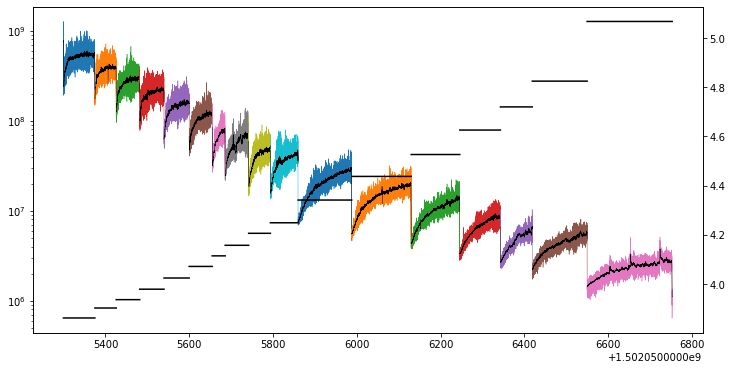

In [25]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(12, 6))

for s in slices:
    plt.plot(s[0], s[1] / fixed_value, linewidth=0.5)
    plt.plot(s[0], moving_average(s[1] / fixed_value, n=30), linewidth=0.5, c="black")
plt.yscale("log")

plt.twinx()
for s in slices:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

In [26]:
slices = []

for i in range(len(vals) - 1):
    slices.append((
        d[0][idxs[i]: idxs[i+1]],
        d[1][idxs[i]: idxs[i+1]],
        np.mean(func(d[0][idxs[i]+1: idxs[i+1]-1])),
        (idxs[i], idxs[i+1])
    ))

In [27]:
def reset_indexes(slices, slice_val=100):
    new_slices = []
    for i, s in enumerate(slices):
        if i == 0:
            new_left = np.argmin(s[1][:slice_val]) + s[3][0]
        else:
            data = np.concatenate((
                slices[i-1][1][-slice_val:],
                slices[i][1][:slice_val]
            ))
            rel_index = np.argmin(data)
            if rel_index < slice_val:
                new_left = slices[i-1][3][1] + rel_index
            else:
                new_left = slices[i][3][0] + rel_index - slice_val
        
        if i == len(slices) - 1:
            new_right = np.argmax(s[1][-slice_val:]) + s[3][1] - slice_val
        else:
            data = np.concatenate((
                slices[i][1][-slice_val:],
                slices[i+1][1][:slice_val]
            ))
            rel_index = np.argmax(data)
            if rel_index < slice_val:
                new_right = slices[i][3][1] + rel_index - slice_val
            else:
                new_right = slices[i+1][3][0] + rel_index - slice_val

        new_slices.append((
            d[0][new_left: new_right],
            d[1][new_left: new_right],
            np.mean(func(d[0][idxs[i]+1: idxs[i+1]-1])),
            (new_left, new_right)
        ))
    return new_slices

            


In [28]:
new_slices = reset_indexes(slices, slice_val=50)

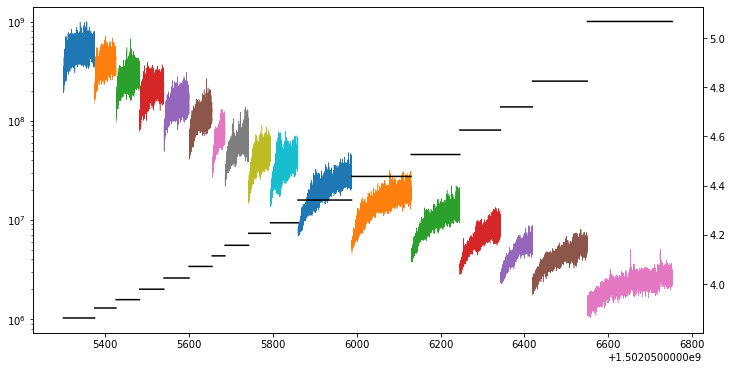

In [29]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(12, 6))

for s in new_slices:
    plt.plot(s[0], s[1] / fixed_value, linewidth=0.5)
plt.yscale("log")

plt.twinx()
for s in new_slices:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

# Interpolations

In [30]:
def gather_points(slices, end_sample):
    points = []
    for s in slices:
        points.append((
            s[0][-1],
            np.nanmin(s[1][-end_sample:]),
            np.nanmean(s[1][-end_sample:]),
            np.nanmax(s[1][-end_sample:]),
        ))
    return points

In [31]:
points = gather_points(new_slices, end_sample=50)
f_min = scipy.interpolate.interp1d(
    np.array([p[0] for p in points]),
    np.array([p[1] for p in points]),
    kind="quadratic",
    bounds_error=False,
    fill_value=np.nan
)
f_mean = scipy.interpolate.interp1d(
    np.array([p[0] for p in points]),
    np.array([p[2] for p in points]),
    kind="quadratic",
    bounds_error=False,
    fill_value=np.nan
)
f_max = scipy.interpolate.interp1d(
    np.array([p[0] for p in points]),
    np.array([p[3] for p in points]),
    kind="quadratic",
    bounds_error=False,
    fill_value=np.nan
)


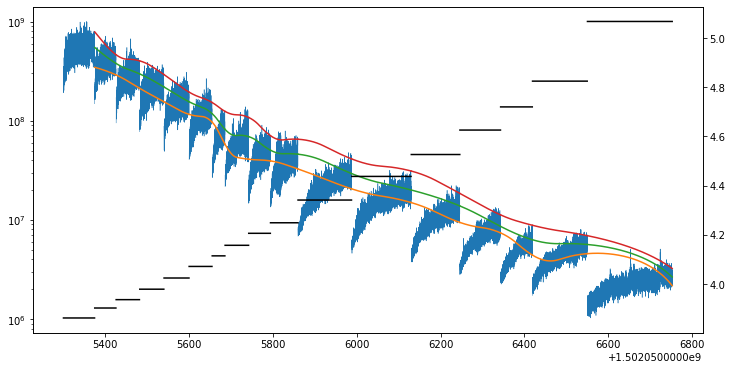

In [32]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(12, 6))

for s in new_slices:
    plt.plot(s[0], s[1] / fixed_value, linewidth=0.5, c="C0")

    plt.plot(s[0], f_min(s[0]) / fixed_value, c="C1")
    plt.plot(s[0], f_mean(s[0]) / fixed_value, c="C2")
    plt.plot(s[0], f_max(s[0]) / fixed_value, c="C3")

plt.yscale("log")

plt.twinx()
for s in new_slices:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

# Normalized recovery currents...

In [33]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [34]:
slice = 25
skipping = 250

In [72]:
x_list = []
x_raw = []
y_list = []
for i in range(1, len(new_slices)):
    from_value = new_slices[i-1][2]
    to_value = new_slices[i][2]
    times = new_slices[i][0] - new_slices[i][0][0]
    the_function = f_max(new_slices[i][0]) / fixed_value
    values = new_slices[i][1] / fixed_value / the_function

    avg_times = moving_average(times, slice)
    avg_values = moving_average(values, slice)

    avg_times = avg_times[::skipping]
    avg_values = avg_values[::skipping]
    
    tmp = moving_average(new_slices[i][0], slice)[::skipping]

    tmp = tmp[~np.isnan(avg_values)]
    avg_times = avg_times[~np.isnan(avg_values)]
    avg_values = avg_values[~np.isnan(avg_values)]
    
    x_raw.append(tmp)
    x_list.append(("forward", from_value, to_value, avg_times))
    y_list.append(avg_values-1)

21


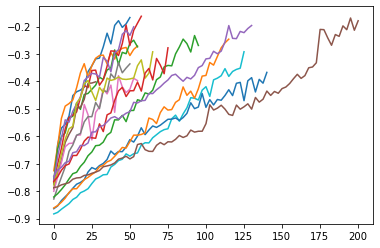

In [47]:
for i, (x, y) in enumerate(zip(x_list, y_list)):
    plt.plot(x[3], y)
    if i==0:
        print(len(y))


In [48]:
from fit_functions import resid_func, ana_current
import lmfit

In [49]:
pars = lmfit.Parameters()
pars.add("I_star", value=1.0, min=0.0)
pars.add("k", value=0.33, min=0.0)
pars.add("c", value=1.0, vary=False)

In [50]:
x_list[0]
y_list[0]

array([-0.77480327, -0.63181914, -0.57004775, -0.55600316, -0.52622605,
       -0.45136035, -0.43748564, -0.43145524, -0.42062387, -0.36385742,
       -0.34299074, -0.31764914, -0.31462826, -0.27369779, -0.22386804,
       -0.26289736, -0.19539797, -0.17825653, -0.20262769, -0.18991426,
       -0.1668338 ])

In [51]:
final = lmfit.minimize(resid_func, pars, args=(x_list, y_list))
c1, c2 = ana_current(final.params, x_list, y_list)

Values: I_star 0.9999999999999998 k 0.33000000000000007
Error: 541.5307209911839
Values: I_star 0.9999999999999998 k 0.33000000000000007
Error: 541.5307209911839
Values: I_star 0.9999999999999998 k 0.33000000000000007
Error: 541.5307209911839
Values: I_star 1.0000000223517418 k 0.33000000000000007
Error: 541.5307209504415
Values: I_star 0.9999999999999998 k 0.33000000861466394
Error: 541.5307209226083
Values: I_star 271.27671246399495 k 63.30493502015135
Error: 517.6284900516031
Values: I_star 271.2767165211794 k 63.30493502015135
Error: 517.6284900453534
Values: I_star 271.27671246399495 k 63.30493406216486
Error: 517.628490025247
Values: I_star 338.8096773609899 k 32.31577926695555
Error: 515.6848333361925
Values: I_star 338.8096824245048 k 32.31577926695555
Error: 515.6848333227247
Values: I_star 338.8096773609899 k 32.315779762952076
Error: 515.6848333969095
Values: I_star 365.73696524881336 k 65.99490975741803
Error: 517.5796578469941
Values: I_star 350.79746225413663 k 10.3765206

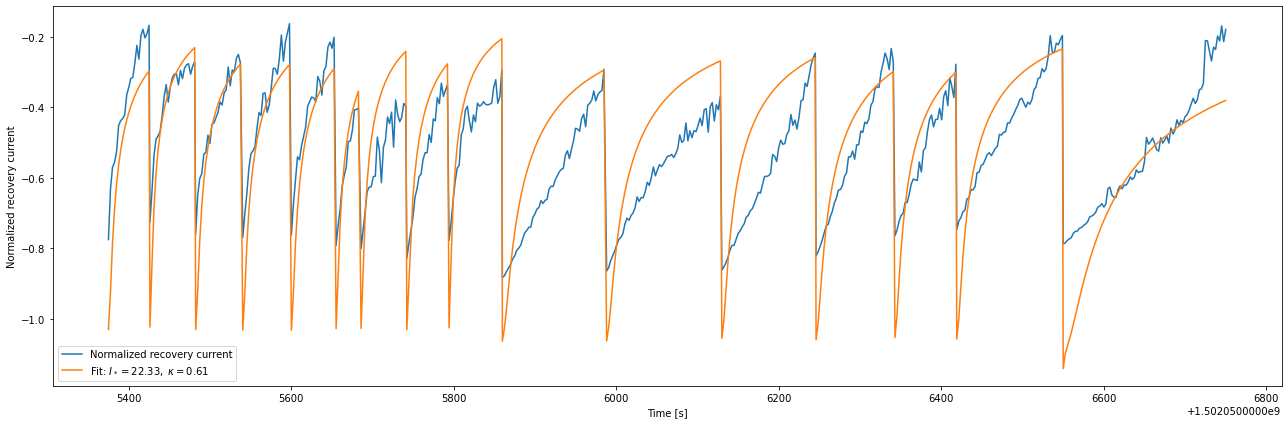

In [74]:
plt.figure(figsize=(18, 6))

tmp = np.array([])
for t in x_raw[:]:
    tmp = np.concatenate((tmp, t))

plt.plot(tmp, c1, label="Normalized recovery current")
plt.plot(tmp, c2, label=f"Fit: $I_*={final.params['I_star'].value:.2f},\\ \\kappa={final.params['k'].value:.2f}$")

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Normalized recovery current")
plt.tight_layout()

In [81]:
import fit_functions
import importlib
importlib.reload(fit_functions)

<module 'fit_functions' from '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/collimator_scans/fit_functions.py'>

In [85]:
pars = lmfit.Parameters()
pars.add("I_star", value=1.0, min=0.0)
pars.add("k", value=0.33, min=0.0)
pars.add("c", value=1.0, vary=True, min=0.0)

In [86]:
x_list[0]
y_list[0]

array([-0.77480327, -0.63181914, -0.57004775, -0.55600316, -0.52622605,
       -0.45136035, -0.43748564, -0.43145524, -0.42062387, -0.36385742,
       -0.34299074, -0.31764914, -0.31462826, -0.27369779, -0.22386804,
       -0.26289736, -0.19539797, -0.17825653, -0.20262769, -0.18991426,
       -0.1668338 ])

In [87]:
final_bis = lmfit.minimize(fit_functions.resid_func, pars, args=(x_list, y_list, False))
c1_bis, c2_bis = fit_functions.ana_current(final.params, x_list, y_list)

Values: I_star 0.9999999999999998 k 0.33000000000000007
Error: 538.4350499001722
Values: I_star 0.9999999999999998 k 0.33000000000000007
Error: 538.4350499001722
Values: I_star 0.9999999999999998 k 0.33000000000000007
Error: 538.4350499001722
Values: I_star 1.0000000223517418 k 0.33000000000000007
Error: 538.4350499960447
Values: I_star 0.9999999999999998 k 0.33000000861466394
Error: 538.4350499253728
Values: I_star 133.42589249460733 k 196.58854804376875
Error: 531.47359460536
Values: I_star 133.4258904916163 k 196.58854804376875
Error: 531.4735946053571
Values: I_star 133.42589249460733 k 196.58855098799214
Error: 531.4735946041893
Values: I_star 133.22455350297062 k 345.4444663367785
Error: 531.4400075660626
Values: I_star 133.22455150297992 k 345.4444663367785
Error: 531.4400075660616
Values: I_star 133.22455350297062 k 345.4444714991603
Error: 531.4400075654015
Values: I_star 133.0236849209821 k 494.3528707425219
Error: 531.4266992580386
Values: I_star 133.02368292398475 k 494.352

KeyboardInterrupt: 

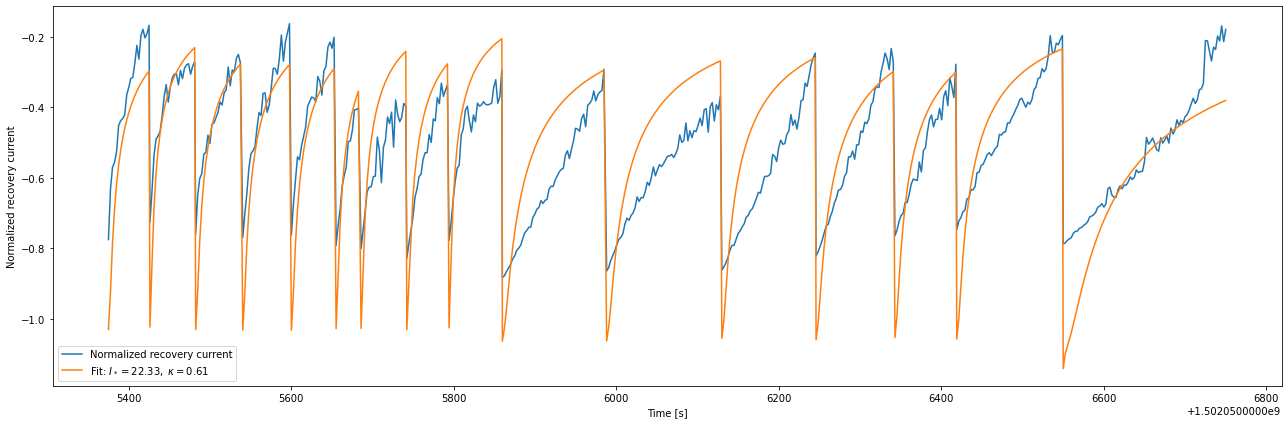

In [ ]:
plt.figure(figsize=(18, 6))

tmp = np.array([])
for t in x_raw[:]:
    tmp = np.concatenate((tmp, t))

plt.plot(tmp, c1_bis, label="Normalized recovery current")
plt.plot(tmp, c2_bis, label=f"Fit: $I_*={final_bis.params['I_star'].value:.2f},\\ \\kappa={final_bis.params['k'].value:.2f}$")

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Normalized recovery current")
plt.tight_layout()

In [41]:
type(final.params)

lmfit.parameter.Parameters

In [42]:
type(pars)

lmfit.parameter.Parameters

In [43]:
resid_func(pars, x_list, y_list)

Values: I_star 1.0 k 0.33


KeyboardInterrupt: 

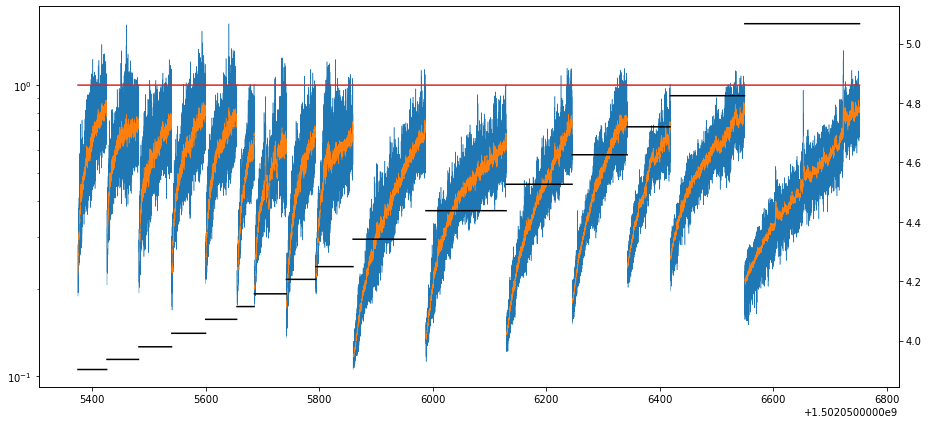

In [ ]:
# plt.figure(figsize=(18, 6))
plt.figure(figsize=(13, 6))


for s in new_slices[0:]:
    the_function = f_max(s[0]) / fixed_value
    plt.plot(s[0], (s[1] / fixed_value) / the_function, linewidth=0.5, c="C0")
    plt.plot(s[0][slice-1:], moving_average((s[1] / fixed_value) / the_function, slice), linewidth=0.5, c="C1")
    # plt.plot(s[0], f_min(s[0]) / fixed_value, c="C1")
    # plt.plot(s[0], f_mean(s[0]) / fixed_value, c="C2")
    plt.plot(s[0], f_max(s[0]) / fixed_value / the_function, c="C3")

plt.yscale("log")

plt.twinx()
for s in new_slices[1:]:
    plt.plot(
        s[0],
        np.ones_like(s[0]) * s[2],
        c="black")

plt.tight_layout()